In [1]:
from datetime import datetime
import os.path
import sys
from pathlib import Path

import backtrader as bt

# import investpy as inv
# import pandas as pd

### Getting strategy return

In [2]:
cerebro = bt.Cerebro()
cerebro.broker.set_cash(1000000.0)
print(f"Starting Portfolio Value: {cerebro.broker.get_value()}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.get_value()}")

Starting Portfolio Value: 1000000.0
Final Portfolio Value: 1000000.0


### Adding data

In [3]:
cerebro = bt.Cerebro()

# Datas are in a subfolder of the samples. Need to find where the script is
# because it could have been called from anywhere
# modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
# datapath = os.path.join(modpath, Path('../../datas/orcl-1995-2014.txt'))


# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)
print(f"Starting Portfolio Value: {cerebro.broker.get_value()}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.get_value()}")

Starting Portfolio Value: 1000000.0
Final Portfolio Value: 1000000.0


### Print close

In [4]:
class TestStrategy(bt.Strategy):
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
    
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    # Strategy 'next' method will be called on each bar of the system clock (self.datas[0]).
    # ** unless indicators with rolling windows/similar are employed **
    def next(self):
        self.log(f'Close: {self.dataclose[0]}')
        

cerebro = bt.Cerebro()

cerebro.addstrategy(TestStrategy)

# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)
print(f"Starting Portfolio Value: {round(cerebro.broker.get_value(), 2)}")
cerebro.run()
print(f"Final Portfolio Value: {round(cerebro.broker.get_value(), 2)}")

Starting Portfolio Value: 1000000.0
2000-01-03, Close: 95.75
2000-01-04, Close: 92.0
2000-01-05, Close: 92.17
2000-01-06, Close: 90.69
2000-01-07, Close: 95.95
2000-01-10, Close: 96.28
2000-01-11, Close: 95.13
2000-01-12, Close: 94.18
2000-01-13, Close: 95.46
2000-01-14, Close: 96.75
2000-01-18, Close: 95.99
2000-01-19, Close: 96.78
2000-01-20, Close: 95.29
2000-01-21, Close: 95.09
2000-01-24, Close: 92.39
2000-01-25, Close: 93.44
2000-01-26, Close: 92.7
2000-01-27, Close: 92.33
2000-01-28, Close: 89.45
2000-01-31, Close: 91.88
2000-02-01, Close: 92.78
2000-02-02, Close: 92.87
2000-02-03, Close: 94.27
2000-02-04, Close: 93.87
2000-02-07, Close: 93.73
2000-02-08, Close: 95.01
2000-02-09, Close: 93.01
2000-02-10, Close: 93.2
2000-02-11, Close: 91.3
2000-02-14, Close: 91.84
2000-02-15, Close: 92.88
2000-02-16, Close: 91.51
2000-02-17, Close: 91.04
2000-02-18, Close: 89.08
2000-02-22, Close: 88.85
2000-02-23, Close: 89.9
2000-02-24, Close: 88.09
2000-02-25, Close: 87.77
2000-02-28, Close: 

Upon init being called the strategy already has a list of datas that are present in the platform

This is a standard Python list and datas can be accessed in the order they were inserted.

The first data in the list self.datas[0] is the default data for trading operations and to keep all strategy elements synchronized (it’s the system clock)

self.dataclose = self.datas[0].close keeps a reference to the close line. Only one level of indirection is later needed to access the close values.

The strategy next method will be called on each bar of the system clock (self.datas[0]). This is true until other things come into play like indicators, which need some bars to start producing an output. More on that later.

### Adding logic

In [5]:
# If the price has been falling 3 sessions in a row - BUY 
class TestStrategy(bt.Strategy):
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
    
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    # Strategy 'next' method will be called on each bar of the system clock (self.datas[0]).
    # ** unless indicators with rolling windows/similar are employed **
    def next(self):
        self.log(f'Close: {self.dataclose[0]}')
        
        if self.dataclose[-1] < self.dataclose[-2]:
            # Previous close less than previous one
            # BUY (with all possible default parameters)
            
            self.log(f'BUY CREATE: {self.dataclose[0]}')
            self.buy()
            
        

cerebro = bt.Cerebro()

cerebro.addstrategy(TestStrategy)

# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)
print(f"Starting Portfolio Value: {round(cerebro.broker.get_value(), 2)}")
cerebro.run()
print(f"Final Portfolio Value: {round(cerebro.broker.get_value(), 2)}")

Starting Portfolio Value: 1000000.0
2000-01-03, Close: 95.75
2000-01-03, BUY CREATE: 95.75
2000-01-04, Close: 92.0
2000-01-05, Close: 92.17
2000-01-05, BUY CREATE: 92.17
2000-01-06, Close: 90.69
2000-01-07, Close: 95.95
2000-01-07, BUY CREATE: 95.95
2000-01-10, Close: 96.28
2000-01-11, Close: 95.13
2000-01-12, Close: 94.18
2000-01-12, BUY CREATE: 94.18
2000-01-13, Close: 95.46
2000-01-13, BUY CREATE: 95.46
2000-01-14, Close: 96.75
2000-01-18, Close: 95.99
2000-01-19, Close: 96.78
2000-01-19, BUY CREATE: 96.78
2000-01-20, Close: 95.29
2000-01-21, Close: 95.09
2000-01-21, BUY CREATE: 95.09
2000-01-24, Close: 92.39
2000-01-24, BUY CREATE: 92.39
2000-01-25, Close: 93.44
2000-01-25, BUY CREATE: 93.44
2000-01-26, Close: 92.7
2000-01-27, Close: 92.33
2000-01-27, BUY CREATE: 92.33
2000-01-28, Close: 89.45
2000-01-28, BUY CREATE: 89.45
2000-01-31, Close: 91.88
2000-01-31, BUY CREATE: 91.88
2000-02-01, Close: 92.78
2000-02-02, Close: 92.87
2000-02-03, Close: 94.27
2000-02-04, Close: 93.87
2000-0

self.datas[0] (the main data aka system clock) is the target asset if no other one is specified

The stake is provided behind the scenes by a position sizer which uses a fixed stake, being the default “1”. It will be modified in a later example

The order is executed “At Market”. The broker (shown in previous examples) executes this using the opening price of the next bar, because that’s the 1st tick after the current under examination bar.

The order is executed so far without any commission (more on that later)

### Adding exit concept

Strategy object offers access to a position attribute for the default data feed
Methods buy and sell return the created (not yet executed) order
Changes in orders’ status will be notified to the strategy via a notify method

The “exit concept” will be an easy one:
Exit after 5 bars (on the 6th bar) have elapsed for good or for worse

Please notice that there is no “time” or “timeframe” implied: number of bars. The bars can represent 1 minute, 1 hour, 1 day, 1 week or any other time period.
Although we know the data source is a daily one, the strategy makes no assumption about that.

Additionally and to simplify:
Do only allow a Buy order if not yet in the market

In [3]:
# If the price has been falling 3 sessions in a row - BUY 
class TestStrategy(bt.Strategy):
    
    params = {
        ('maperiod', 15)
    }
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        
        # Keep track of pending orders/price/commish
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],
            period = self.params.maperiod
        )
    
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: rboker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: # Sell
                self.log(
                    f'SELL EXECUTED, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            self.bar_executed = len(self)
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(f'OPERATION PROFIT, GROSS {trade.pnl}, NET {trade.pnlcomm}')

    # Strategy 'next' method will be called on each bar of the system clock (self.datas[0]).
    # ** unless indicators with rolling windows/similar are employed **
    def next(self):
        self.log(f'Close: {self.dataclose[0]}')
        
        # Check if an order is pending
        # if yes, we cannot send a 2nd one
        if self.order:
            return
        
        # Check if we have an open position
        if not self.position:
            
            # Not yet.. we MIGHT BUY if ..
            if self.dataclose[0] > self.sma[0]:
                
                # BUY BUY BUY (with all possible default parameters)
                self.log(f'BUY CREATE: {self.dataclose[0]}')
                
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
        
        else:
        
            if self.dataclose[0] < self.sma[0]:
                # SELL SELL SELL (with all possible default parameters)
                self.log(f'SELL CREATE: {self.dataclose[0]}')
                
                # Keep track of the created order to avoid a 2nd one
                self.order = self.sell()          


cerebro = bt.Cerebro()

cerebro.addstrategy(TestStrategy)

# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)

# Add a fixed sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)

# Set the commission
cerebro.broker.setcommission(commission=0.0)

print(f"Starting Portfolio Value: {round(cerebro.broker.get_value(), 2)}")
cerebro.run()
print(f"Final Portfolio Value: {round(cerebro.broker.get_value(), 2)}")

Starting Portfolio Value: 1000000.0
2000-01-24, Close: 92.39
2000-01-25, Close: 93.44
2000-01-26, Close: 92.7
2000-01-27, Close: 92.33
2000-01-28, Close: 89.45
2000-01-31, Close: 91.88
2000-02-01, Close: 92.78
2000-02-02, Close: 92.87
2000-02-03, Close: 94.27
2000-02-03, BUY CREATE: 94.27
2000-02-04, BUY EXECUTED, Price: 94.27, Cost 942.6999999999999,                        Comm 0.0
2000-02-04, Close: 93.87
2000-02-07, Close: 93.73
2000-02-08, Close: 95.01
2000-02-09, Close: 93.01
2000-02-09, SELL CREATE: 93.01
2000-02-10, SELL EXECUTED, Price: 93.24, Cost 942.6999999999999,                        Comm 0.0
2000-02-10, OPERATION PROFIT, GROSS {trade.pnl}, NET {trade.pnlcomm}
2000-02-10, Close: 93.2
2000-02-10, BUY CREATE: 93.2
2000-02-11, BUY EXECUTED, Price: 93.38, Cost 933.8,                        Comm 0.0
2000-02-11, Close: 91.3
2000-02-11, SELL CREATE: 91.3
2000-02-14, SELL EXECUTED, Price: 92.02, Cost 933.8,                        Comm 0.0
2000-02-14, OPERATION PROFIT, GROSS {trad

### Add commission and P/L per position cycle

In [ ]:
# If the price has been falling 3 sessions in a row - BUY 
class TestStrategy(bt.Strategy):
    
    params = {
        ('maperiod', 15)
    }
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        
        # Keep track of pending orders/price/commish
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],
            period = self.params.maperiod
        )
    
    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: rboker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: # Sell
                self.log(
                    f'SELL EXECUTED, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            self.bar_executed = len(self)
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(f'OPERATION PROFIT, GROSS {trade.pnl}, NET {trade.pnlcomm}')

    # Strategy 'next' method will be called on each bar of the system clock (self.datas[0]).
    # ** unless indicators with rolling windows/similar are employed **
    def next(self):
        self.log(f'Close: {self.dataclose[0]}')
        
        # Check if an order is pending
        # if yes, we cannot send a 2nd one
        if self.order:
            return
        
        # Check if we have an open position
        if not self.position:
            
            # Not yet.. we MIGHT BUY if ..
            if self.dataclose[0] > self.sma[0]:
                
                # BUY BUY BUY (with all possible default parameters)
                self.log(f'BUY CREATE: {self.dataclose[0]}')
                
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
        
        else:
        
            if self.dataclose[0] < self.sma[0]:
                # SELL SELL SELL (with all possible default parameters)
                self.log(f'SELL CREATE: {self.dataclose[0]}')
                
                # Keep track of the created order to avoid a 2nd one
                self.order = self.sell()          


cerebro = bt.Cerebro()

cerebro.addstrategy(TestStrategy)

# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)

# Add a fixed sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)

# Set the commission to 0.1%
cerebro.broker.setcommission(commission=0.001)

print(f"Starting Portfolio Value: {round(cerebro.broker.get_value(), 2)}")
cerebro.run()
print(f"Final Portfolio Value: {round(cerebro.broker.get_value(), 2)}")

### Strategy Parameters & Position Size

In [6]:
# If the price has been falling 3 sessions in a row - BUY 
class TestStrategy(bt.Strategy):
    
    params = {
        ('maperiod', 15),
        ('exitbars', 5)
    }
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        
        # Keep track of pending orders/price/commish
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],
            period = self.params.maperiod
        )
    
    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: rboker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED, Size: {order.executed.size}, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: # Sell
                self.log(
                    f'SELL EXECUTED, Size: {order.executed.size}, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            self.bar_executed = len(self)
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(f'OPERATION PROFIT, GROSS {trade.pnl}, NET {trade.pnlcomm}')

    # Strategy 'next' method will be called on each bar of the system clock (self.datas[0]).
    # ** unless indicators with rolling windows/similar are employed **
    def next(self):
        self.log(f'Close: {self.dataclose[0]}')
        
        # Check if an order is pending
        # if yes, we cannot send a 2nd one
        if self.order:
            return
        
        # Check if we have an open position
        if not self.position:
            
            # Not yet.. we MIGHT BUY if ..
            if self.dataclose[0] > self.sma[0]:
                
                # BUY BUY BUY (with all possible default parameters)
                self.log(f'BUY CREATE: {self.dataclose[0]}')
                
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
        
        else:
        
            if self.dataclose[0] < self.sma[0]:
                # Already in the market ... we might sell
                if len(self) >= (self.bar_executed + self.params.exitbars):
                
                    # SELL SELL SELL (with all possible default parameters)
                    self.log(f'SELL CREATE: {self.dataclose[0]}')
                    
                    # Keep track of the created order to avoid a 2nd one
                    self.order = self.sell()          


cerebro = bt.Cerebro()

# Params can also be added here
# cerebro.addstrategy(TestStrategy, myparam=20, exitbars=7)
cerebro.addstrategy(TestStrategy)

# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)

# Add a fixed sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)


# Set the commission to 0.1%
cerebro.broker.setcommission(commission=0.001)

print(f"Starting Portfolio Value: {round(cerebro.broker.get_value(), 2)}")
cerebro.run()
print(f"Final Portfolio Value: {round(cerebro.broker.get_value(), 2)}")

Starting Portfolio Value: 1000000.0
2000-01-24, Close: 92.39
2000-01-25, Close: 93.44
2000-01-26, Close: 92.7
2000-01-27, Close: 92.33
2000-01-28, Close: 89.45
2000-01-31, Close: 91.88
2000-02-01, Close: 92.78
2000-02-02, Close: 92.87
2000-02-03, Close: 94.27
2000-02-03, BUY CREATE: 94.27
2000-02-04, BUY EXECUTED, Size: 10, Price: 94.27, Cost 942.6999999999999,                        Comm 0.9427
2000-02-04, Close: 93.87
2000-02-07, Close: 93.73
2000-02-08, Close: 95.01
2000-02-09, Close: 93.01
2000-02-10, Close: 93.2
2000-02-11, Close: 91.3
2000-02-11, SELL CREATE: 91.3
2000-02-14, SELL EXECUTED, Size: -10, Price: 92.02, Cost 942.6999999999999,                        Comm 0.9202
2000-02-14, OPERATION PROFIT, GROSS -22.5, NET -24.3629
2000-02-14, Close: 91.84
2000-02-15, Close: 92.88
2000-02-15, BUY CREATE: 92.88
2000-02-16, BUY EXECUTED, Size: 10, Price: 92.41, Cost 924.0999999999999,                        Comm 0.9241
2000-02-16, Close: 91.51
2000-02-17, Close: 91.04
2000-02-18, Close

### Adding Indicators


Buy “AtMarket” if the close is greater than the Average

If in the market, sell if the close is smaller than the Average

Only 1 active operation is allowed in the market

In [7]:
# If the price has been falling 3 sessions in a row - BUY 
class TestStrategy(bt.Strategy):
    
    params = {
        ('maperiod', 15),
        ('exitbars', 5)
    }
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        
        # Keep track of pending orders/price/commish
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],
            period = self.params.maperiod
        )
    
    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: rboker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED, Size: {order.executed.size}, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: # Sell
                self.log(
                    f'SELL EXECUTED, Size: {order.executed.size}, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            self.bar_executed = len(self)
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(f'OPERATION PROFIT, GROSS {trade.pnl}, NET {trade.pnlcomm}')

    # Strategy 'next' method will be called on each bar of the system clock (self.datas[0]).
    # ** unless indicators with rolling windows/similar are employed **
    def next(self):
        self.log(f'Close: {self.dataclose[0]}')
        
        # Check if an order is pending
        # if yes, we cannot send a 2nd one
        if self.order:
            return
        
        # Check if we have an open position
        if not self.position:
            
            # Not yet.. we MIGHT BUY if ..
            if self.dataclose[0] > self.sma[0]:
                
                # BUY BUY BUY (with all possible default parameters)
                self.log(f'BUY CREATE: {self.dataclose[0]}')
                
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
        
        else:
        
            if self.dataclose[0] < self.sma[0]:
                # Already in the market ... we might sell
                if len(self) >= (self.bar_executed + self.params.exitbars):
                
                    # SELL SELL SELL (with all possible default parameters)
                    self.log(f'SELL CREATE: {self.dataclose[0]}')
                    
                    # Keep track of the created order to avoid a 2nd one
                    self.order = self.sell()          


cerebro = bt.Cerebro()

# Params can also be added here
# cerebro.addstrategy(TestStrategy, myparam=20, exitbars=7)
cerebro.addstrategy(TestStrategy)

# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)

# Add a fixed sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)


# Set the commission to 0.1%
cerebro.broker.setcommission(commission=0.001)

print(f"Starting Portfolio Value: {round(cerebro.broker.get_value(), 2)}")
cerebro.run()
print(f"Final Portfolio Value: {round(cerebro.broker.get_value(), 2)}")

Starting Portfolio Value: 1000000.0
2000-01-24, Close: 92.39
2000-01-25, Close: 93.44
2000-01-26, Close: 92.7
2000-01-27, Close: 92.33
2000-01-28, Close: 89.45
2000-01-31, Close: 91.88
2000-02-01, Close: 92.78
2000-02-02, Close: 92.87
2000-02-03, Close: 94.27
2000-02-03, BUY CREATE: 94.27
2000-02-04, BUY EXECUTED, Size: 10, Price: 94.27, Cost 942.6999999999999,                        Comm 0.9427
2000-02-04, Close: 93.87
2000-02-07, Close: 93.73
2000-02-08, Close: 95.01
2000-02-09, Close: 93.01
2000-02-10, Close: 93.2
2000-02-11, Close: 91.3
2000-02-11, SELL CREATE: 91.3
2000-02-14, SELL EXECUTED, Size: -10, Price: 92.02, Cost 942.6999999999999,                        Comm 0.9202
2000-02-14, OPERATION PROFIT, GROSS -22.5, NET -24.3629
2000-02-14, Close: 91.84
2000-02-15, Close: 92.88
2000-02-15, BUY CREATE: 92.88
2000-02-16, BUY EXECUTED, Size: 10, Price: 92.41, Cost 924.0999999999999,                        Comm 0.9241
2000-02-16, Close: 91.51
2000-02-17, Close: 91.04
2000-02-18, Close

### Plotting

A 2nd MovingAverage (Exponential) will be added. The defaults will plot it (just like the 1st) with the data.

A 3rd MovingAverage (Weighted) will be added. Customized to plot in an own plot (even if not sensible)

A Stochastic (Slow) will be added. No change to the defaults.

A MACD will be added. No change to the defaults.

A RSI will be added. No change to the defaults.

A MovingAverage (Simple) will be applied to the RSI. No change to the defaults (it will be plotted with the RSI)

An AverageTrueRange will be added. Changed defaults to avoid it being plotted.

Starting Portfolio Value: 1000000.0
2000-02-18, Close: 89.08
2000-02-22, Close: 88.85
2000-02-23, Close: 89.9
2000-02-24, Close: 88.09
2000-02-25, Close: 87.77
2000-02-28, Close: 89.62
2000-02-29, Close: 90.48
2000-03-01, Close: 91.14
2000-03-01, BUY CREATE: 91.14
2000-03-02, BUY EXECUTED, Size: 10, Price: 91.3, Cost 913.0,                        Comm 0.913
2000-03-02, Close: 91.2
2000-03-03, Close: 92.91
2000-03-06, Close: 92.0
2000-03-07, Close: 90.22
2000-03-08, Close: 90.11
2000-03-09, Close: 92.74
2000-03-10, Close: 92.25
2000-03-13, Close: 91.24
2000-03-14, Close: 89.94
2000-03-14, SELL CREATE: 89.94
2000-03-15, SELL EXECUTED, Size: -10, Price: 90.11, Cost 913.0,                        Comm 0.9011
2000-03-15, OPERATION PROFIT, GROSS -11.899999999999977, NET -13.714099999999977
2000-03-15, Close: 92.04
2000-03-15, BUY CREATE: 92.04
2000-03-16, BUY EXECUTED, Size: 10, Price: 93.24, Cost 932.4,                        Comm 0.9324
2000-03-16, Close: 96.34
2000-03-17, Close: 96.98
2000

<IPython.core.display.Javascript object>

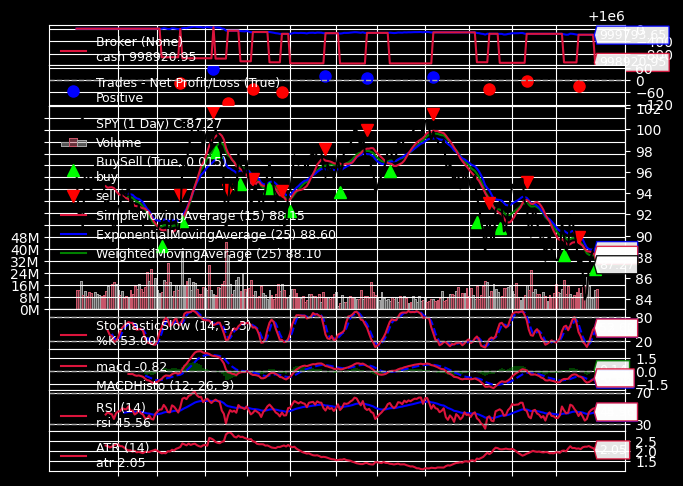

In [16]:
# If the price has been falling 3 sessions in a row - BUY 
class TestStrategy(bt.Strategy):
    
    params = {
        ('maperiod', 15),
        ('exitbars', 5)
    }
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        
        # Keep track of pending orders/price/commish
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],
            period = self.params.maperiod
        )
        
        # Indicators for the plotting show
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25).subplot = True
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        bt.indicators.ATR(self.datas[0]).plot = False
    
    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: rboker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED, Size: {order.executed.size}, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: # Sell
                self.log(
                    f'SELL EXECUTED, Size: {order.executed.size}, Price: {order.executed.price}, Cost {order.executed.value},\
                        Comm {order.executed.comm}'
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            self.bar_executed = len(self)
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(f'OPERATION PROFIT, GROSS {trade.pnl}, NET {trade.pnlcomm}')

    # Strategy 'next' method will be called on each bar of the system clock (self.datas[0]).
    # ** unless indicators with rolling windows/similar are employed **
    def next(self):
        self.log(f'Close: {self.dataclose[0]}')
        
        # Check if an order is pending
        # if yes, we cannot send a 2nd one
        if self.order:
            return
        
        # Check if we have an open position
        if not self.position:
            
            # Not yet.. we MIGHT BUY if ..
            if self.dataclose[0] > self.sma[0]:
                
                # BUY BUY BUY (with all possible default parameters)
                self.log(f'BUY CREATE: {self.dataclose[0]}')
                
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
        
        else:
        
            if self.dataclose[0] < self.sma[0]:
                # Already in the market ... we might sell
                if len(self) >= (self.bar_executed + self.params.exitbars):
                
                    # SELL SELL SELL (with all possible default parameters)
                    self.log(f'SELL CREATE: {self.dataclose[0]}')
                    
                    # Keep track of the created order to avoid a 2nd one
                    self.order = self.sell()          


cerebro = bt.Cerebro()

# Params can also be added here
# cerebro.addstrategy(TestStrategy, myparam=20, exitbars=7)
cerebro.addstrategy(TestStrategy)

# Create data feed
data = bt.feeds.YahooFinanceCSVData(
    dataname='./data/SPY.csv',
    fromdate=datetime(2000, 1, 1),
    todate=datetime(2000, 12, 31),
    reverse=False
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Run cerebro and get the return
cerebro.broker.set_cash(1000000.0)

# Add a fixed sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)


# Set the commission to 0.1%
cerebro.broker.setcommission(commission=0.001)

print(f"Starting Portfolio Value: {round(cerebro.broker.get_value(), 2)}")
cerebro.run()
print(f"Final Portfolio Value: {round(cerebro.broker.get_value(), 2)}")

# Plot results
cerebro.plot()[0][0]